![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez

# Practical Lab 3 - Univariate Linear Regression

## 1. Framing the Problem - Describe the goal of this report

The practical Lab 3 is about exploring the house prices for California districts derived from the 1990 census and using linear regression between: 

1.	median house value vs. median income
2.	median house value vs. population
3.	median house value vs. number of households

These 3 linear regressions will assist us in interpreting the scenario of Housing Prices in this American State and in addition, we will generate predictions by using linear regression. Linear regression models have become a proven good way to scientifically and reliably predict the future because linear regression is a long-established statistical procedure. 

At the end of this task, we will be able to predict the median house value by analyzing the median income, the population and the number of households. 

The data can be found at this [link ](https://www.kaggle.com/datasets/camnugent/california-housing-prices ). 

For interest, this house prices for California dataset is used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow', one of the best books in its field. 

![Image](https://i0.wp.com/studentwork.prattsi.org/infovis/wp-content/uploads/sites/3/2021/05/housing.jpg?resize=840%2C382&ssl=1)

## 2. Getting the Data - hyperlinking to the source and loading into Pandas:

In [1]:
import pandas as pd


house = pd.read_csv('./housing.csv')
house.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Exploratory Data Analysis (EDA):

### 3.1. Explore statistics (e.g. using Pandas `describe` function)

In [2]:
house.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3.2. Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice. 

3.2.1  Median house value  
The dataset contains the median of the house value for each district. 
Where the average house value in all entries of our dataset is a mean: of 206,855.82. 
The first quartile is 119,600.00 which indicates that 25% of the median house values are below this number, showing that a quarter of the properties have lower values.

3.2.2  Median income 
In this dataset, we have information regarding the Median income which refers to the income level earned by a given household where half of the households in the geographic area of interest earn more and half earn less. 
First, the median income attribute does not look like it is expressed in US dollars (USD). After checking the book by Aurélien Géron (pg.53) for the exact interpretation of these values is writing that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).
Back to the table data, 25% of the median income values are below 2.5634, suggesting that a quarter of the areas have relatively lower incomes if compared with the average median all incomes which is a  mean of 3.87. 

3.2.3  Population	
The dataset contains the population value for each district. 
By analysing the 75th percentile (Q3) value for the population, we can say tha 75% of the areas or districts in the dataset have a population of 1,725 or fewer individuals, while the remaining 25% have a population greater than 1,725.

3.2.4  Number of households
A household includes all the people who occupy a housing unit as their usual place of residence. 
On average, there are about 499.54 households in the areas covered by the dataset.(Mean: 499.54) and 25% of the areas have 280 or fewer households.


![image](https://storage.googleapis.com/kaggle-datasets-images/24824/31630/a5f5ce1e4b4066d1f222e79e8286f077/dataset-cover.jpg?t=2018-05-03-00-52-48)

### 3.3. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual review of what you see in these graphs (relevant insights).

#### 3.3.1. Seaborn scatter plot: Median house value vs. median income

Text(0.5, 1.0, 'Median House Value vs. Median Income')

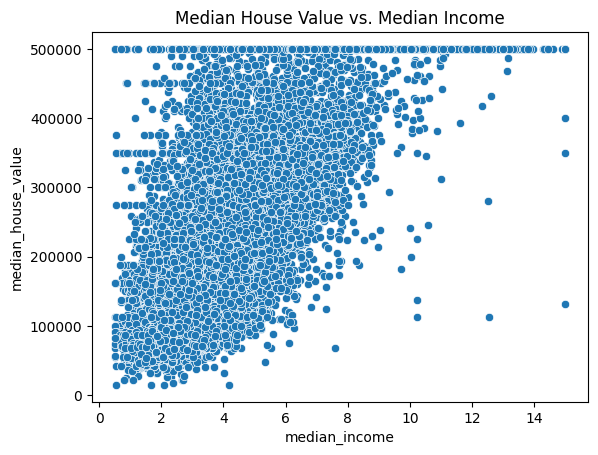

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="median_income", y="median_house_value", data=house)
plt.title('Median House Value vs. Median Income')


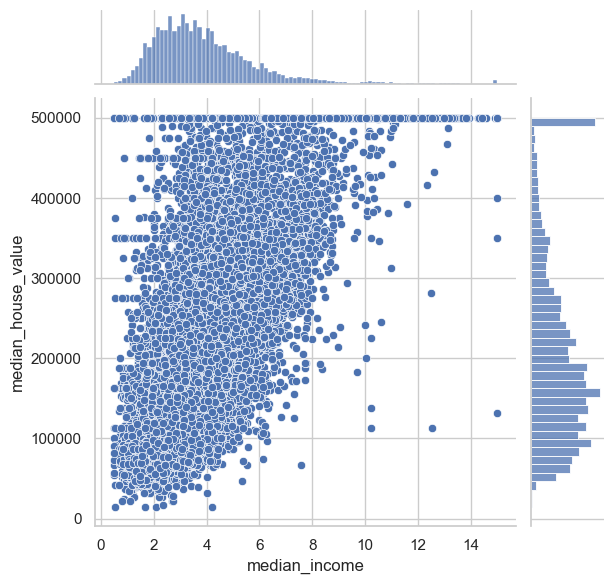

In [4]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=house)


#### 3.3.2. Seaborn scatter plot: Median house value vs. population

Text(0.5, 1.0, 'Population vs. Median Income')

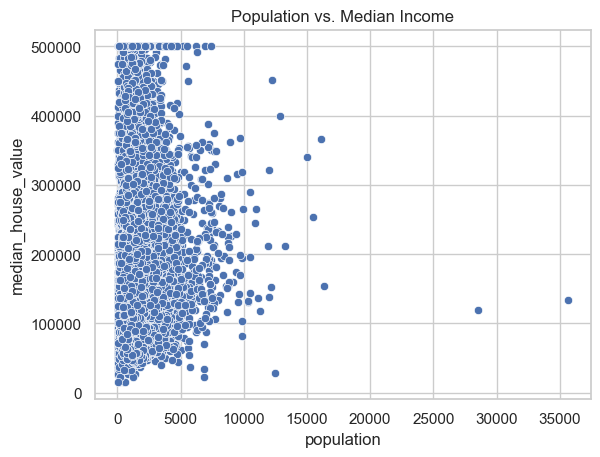

In [5]:
sns.scatterplot(x="population", y="median_house_value", data=house)
plt.title('Population vs. Median Income')

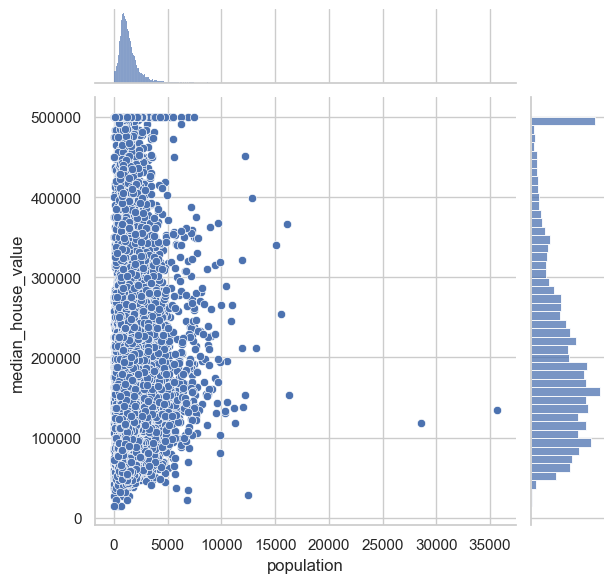

In [6]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=house)

#### 3.3.3. Seaborn scatter plot: Median house value vs. number of households

Text(0.5, 1.0, 'Households vs. Median Income')

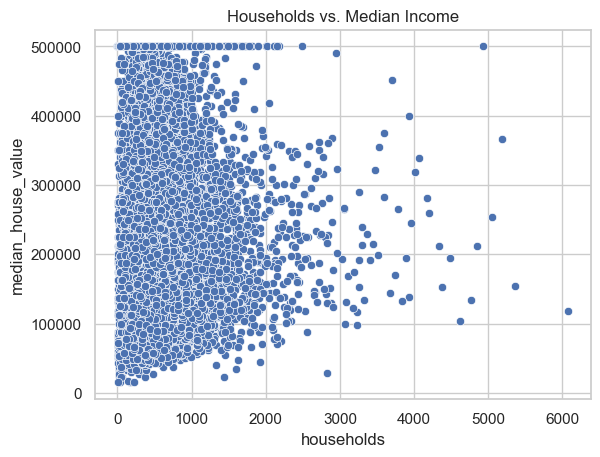

In [7]:
sns.scatterplot(x="households", y="median_house_value", data=house)
plt.title('Households vs. Median Income')

## 4. Run three linear regressions (fitting) between

In [8]:
from sklearn import linear_model

#### 4.1. Run linear regressions (fitting): Median house value vs. median income

In [9]:
model = linear_model.LinearRegression() 

model.fit(X=house[["median_income"]], y=house[["median_house_value"]])

LinearRegression()

#### 4.2. Run linear regressions (fitting): Median house value vs. population

In [10]:
model_2 = linear_model.LinearRegression() 

# fit
model_2.fit(X=house[["population"]], y=house[["median_house_value"]])

LinearRegression()

Plot the resulting line on top of the scatter data for the model (item 6)

#### 4.3. Run linear regressions (fitting): Median house value vs. number of households

In [11]:
model_3 = linear_model.LinearRegression() 
# fit
model_3.fit(X=house[["households"]], y=house[["median_house_value"]])

LinearRegression()

## 5. Summarize in a table, for each of the three models:

- intercept and slope 
- Mean Squared Error - the loss 
- Mean Absolute Error 

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### 5.1 Model 1: Median house value vs. median income

In [13]:
# print coefficients
int_mod = model.intercept_
cof_mod = model.coef_

print(f"Intercept: {int_mod}")
print(f"Coefficients: {cof_mod}")

Intercept: [36683.26528939]
Coefficients: [[4.17488176e+04 1.71690342e+01]]


In [14]:
print("Train set")
me_s_mod = mean_squared_error(house[['median_house_value']], model.predict(house[['median_income']]))
me_a_mod = mean_absolute_error(house[['median_house_value']], model.predict(house[['median_income']]))

print(f"Mean squared error: {me_s_mod}")
print(f"Mean absolute error: {me_a_mod}")

Train set


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- households


#### 5.2. Model 2: Median house value vs. population

In [ ]:
# print coefficients
int_mod_2 = model_2.intercept_
cof_mod_2 = model_2.coef_

print(f"Intercept: {int_mod_2}")
print(f"Coefficients: {cof_mod_2}")

Intercept: [210436.26207627]
Coefficients: [[-2.51175277]]


In [ ]:
print("Train set")
me_s_mod_2 = mean_squared_error(house[['median_house_value']], model_2.predict(house[['population']]))
me_a_mod_2 = mean_absolute_error(house[['median_house_value']], model_2.predict(house[['population']]))

print(f"Mean squared error: {me_s_mod_2}")
print(f"Mean absolute error: {me_a_mod_2}")

Train set
Mean squared error: 13307412412.389355
Mean absolute error: 91153.82009473183


#### 5.3. Model 3: Median house value vs. households

In [ ]:
# print coefficients
int_mod_3 = model_3.intercept_
cof_mod_3 = model_3.coef_

print(f"Intercept: {int_mod_3}")
print(f"Coefficients: {cof_mod_3}")

Intercept: [196928.57716233]
Coefficients: [[19.87277516]]


In [ ]:
print("Train set")
me_s_mod_3 = mean_squared_error(house[['median_house_value']], model_3.predict(house[['households']]))
me_a_mod_3 = mean_absolute_error(house[['median_house_value']], model_3.predict(house[['households']]))

print(f"Mean squared error: {me_s_mod_3}")
print(f"Mean absolute error: {me_a_mod_3}")

Train set
Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318448


#### 5.4. Summarize table 

In [ ]:
# Creating a dictionary for the table
data = {
    "Metric": ["Intercept", "Coefficient", "Mean Squared Error", "Mean Absolute Error"],
    "Model 1": [int_mod[0], cof_mod[0], me_s_mod, me_a_mod],
    "Model 2": [int_mod_2[0], cof_mod_2[0], me_s_mod_2, me_a_mod_2],
    "Model 3": [int_mod_3[0], cof_mod_3[0], me_s_mod_3, me_a_mod_3],
}

# Converting the dictionary to a DataFrame
table = pd.DataFrame(data)

# Displaying the DataFrame
table

,Metric,Model 1,Model 2,Model 3
0,Intercept,45085.576703,210436.262076,196928.577162
1,Coefficient,[41793.849201896286],[-2.511752774615085],[19.872775155643875]
2,Mean Squared Error,7011311502.929527,13307412412.389355,13257776904.728533
3,Mean Absolute Error,62625.933791,91153.820095,90802.743243


## 6. Plot the resulting line on top of the scatter data for the models 

#### 6.1. Resulting line on top of the scatter data : Median house value vs. median income

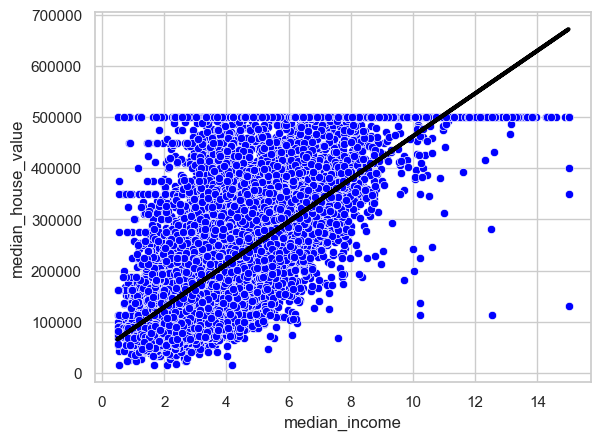

In [ ]:
sns.scatterplot(x="median_income", y="median_house_value", data=house, color="blue")
plt.plot(house[["median_income"]], model.predict(house[["median_income"]]), color="black", linewidth=3)
plt.show()

#### 6.2. Resulting line on top of the scatter data : Median house value vs. population

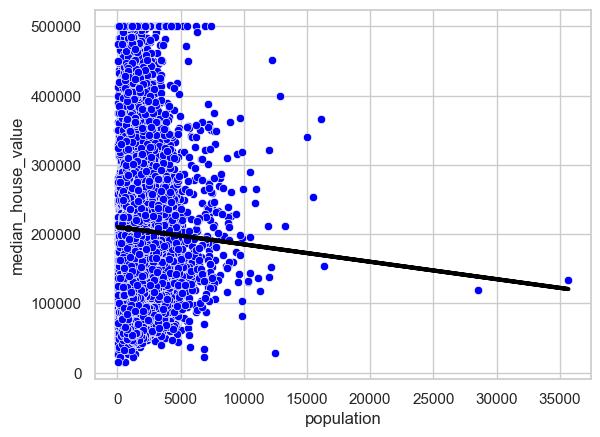

In [ ]:
sns.scatterplot(x="population", y="median_house_value", data=house, color="blue")
plt.plot(house[["population"]], model_2.predict(house[["population"]]), color="black", linewidth=3)
plt.show()

#### 6.3. Resulting line on top of the scatter data : Median house value vs. number of households

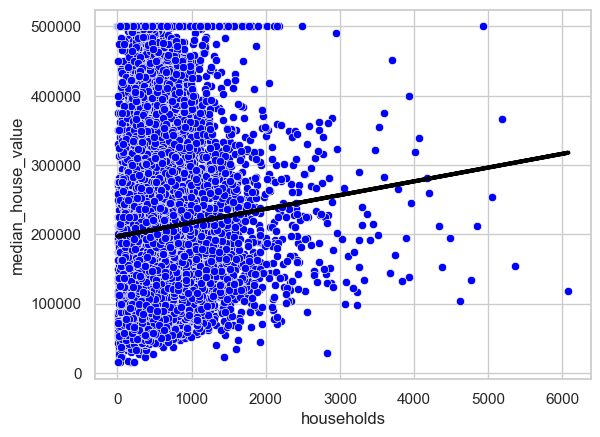

In [ ]:
sns.scatterplot(x="households", y="median_house_value", data=house, color="blue")
plt.plot(house[["households"]], model_3.predict(house[["households"]]), color="black", linewidth=3)
plt.show()

## 7. Provide a conclusion about the goodness-of-fit, and other insights you might have 

The first model gives a good understanding of the relationship between median income and median house value. In the first model, most of the data are clustered in the values 2 and 7 of the median income scale,  showing the linear regression line is doing nice work in predicting higher house values. 

The second model data points are dispersed, showing that the population alone is not a strong predictor of house value and this indicates that population number and median house value are not strongly linear. 

In the third model, as the number of households increases, the median house value also looks to increase, as indicated by the regression line.

Also in the third model, the data points are clustered at the lower end of the household scale, with a few data points at the higher of the scale. This suggests that most of the districts have a smaller number of households.

In all graphs in the median house value, 500.000 is a strange bulk of data and these could represent special cases or errors in the data or errors in the input process. 